<a href="https://colab.research.google.com/github/Karanveer08/Olympic-Hero/blob/master/Numerai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import tensorflow

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Loading Dataset**

In [0]:
training_data = pd.read_csv('/content/drive/My Drive/dataset/numerai_training_data.csv',header=0)
tournament_data =pd.read_csv('/content/drive/My Drive/dataset/numerai_tournament_data.csv',header=0)

In [0]:
training_data.head()

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,feature_intelligence11,feature_intelligence12,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,...,feature_wisdom8,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom12,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom16,feature_wisdom17,feature_wisdom18,feature_wisdom19,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom23,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom29,feature_wisdom30,feature_wisdom31,feature_wisdom32,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target_kazutsugi
0,n000315175b67977,era1,train,0.00,0.50,0.25,0.00,0.5,0.25,0.25,0.25,0.75,0.75,0.25,0.25,1.00,0.75,0.5,1.0,0.5,0.00,0.50,0.50,0.00,0.0,0.00,1.00,0.25,0.00,0.50,0.25,0.75,0.50,1.00,0.75,0.75,0.5,0.50,0.75,0.5,...,0.75,0.75,0.75,0.50,1.00,1.00,0.50,0.75,0.5,0.25,0.25,0.75,0.50,1.00,0.5,0.75,0.75,0.25,0.50,1.00,0.75,0.50,0.50,1.00,0.25,0.5,0.50,0.50,0.75,1.00,1.00,1.00,0.75,0.50,0.75,0.50,1.00,0.50,0.75,0.75
1,n0014af834a96cdd,era1,train,0.00,0.00,0.00,0.25,0.5,0.00,0.00,0.25,0.50,0.50,0.00,0.50,0.00,0.50,0.5,0.5,0.5,0.50,0.25,0.25,0.50,0.0,1.00,0.50,0.50,0.50,0.75,0.50,0.50,0.75,0.25,0.50,0.75,0.5,0.25,0.75,0.5,...,0.25,0.25,0.25,1.00,1.00,0.50,0.50,0.50,0.0,0.25,1.00,0.50,1.00,1.00,0.5,0.50,0.50,1.00,0.25,0.75,1.00,0.25,0.25,1.00,0.50,0.5,0.50,0.75,0.75,0.75,1.00,1.00,0.00,0.00,0.75,0.25,0.00,0.25,1.00,0.25
2,n001c93979ac41d4,era1,train,0.25,0.50,0.25,0.25,1.0,0.75,0.75,0.25,0.00,0.25,0.50,1.00,0.50,0.75,0.5,0.5,1.0,0.50,0.50,0.50,0.25,0.0,0.25,0.75,0.75,0.75,0.50,0.75,0.50,0.25,0.50,0.75,0.25,0.5,0.50,0.75,0.5,...,0.25,1.00,1.00,1.00,0.50,1.00,1.00,1.00,0.5,1.00,0.00,1.00,1.00,0.50,1.0,0.75,1.00,0.00,0.50,0.75,0.00,1.00,0.50,0.50,0.75,1.0,0.75,1.00,0.25,0.50,0.25,0.50,0.00,0.00,0.50,1.00,0.00,0.25,0.75,0.00
3,n0034e4143f22a13,era1,train,1.00,0.00,0.00,0.50,0.5,0.25,0.25,0.75,0.25,0.50,0.50,0.50,0.75,0.50,1.0,0.5,0.5,0.00,1.00,0.00,0.75,0.0,0.50,0.50,0.50,0.50,0.00,0.50,0.50,0.75,0.75,0.50,0.25,0.5,0.50,0.50,0.5,...,1.00,1.00,0.75,0.75,1.00,0.75,0.75,0.75,1.0,0.75,1.00,0.75,1.00,0.75,1.0,0.00,0.50,0.75,1.00,0.75,1.00,0.75,1.00,1.00,0.00,0.5,0.75,0.75,1.00,0.75,1.00,1.00,0.75,0.75,1.00,1.00,0.75,1.00,1.00,0.00
4,n00679d1a636062f,era1,train,0.25,0.25,0.25,0.25,0.0,0.25,0.50,0.25,0.25,0.50,0.25,0.25,0.75,0.50,0.0,0.5,0.5,0.25,0.00,0.50,0.00,0.5,0.25,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.75,0.50,0.25,0.5,0.50,0.50,0.5,...,1.00,0.25,0.75,1.00,0.75,0.00,0.00,0.75,0.5,1.00,0.50,0.75,0.25,0.50,0.0,0.50,0.50,0.50,0.75,0.75,0.50,0.75,0.25,0.75,0.50,0.5,0.25,0.25,0.75,0.50,0.75,0.75,0.25,0.50,0.75,0.00,0.50,0.25,0.75,0.75


In [0]:
training_data.describe()

,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,feature_intelligence11,feature_intelligence12,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,feature_charisma26,feature_charisma27,feature_charisma28,...,feature_wisdom8,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom12,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom16,feature_wisdom17,feature_wisdom18,feature_wisdom19,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom23,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom29,feature_wisdom30,feature_wisdom31,feature_wisdom32,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target_kazutsugi
count,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,...,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000
mean,0.499981,0.499979,0.499979,0.499981,0.499977,0.499977,0.499977,0.499981,0.499980,0.499980,0.499981,0.499977,0.499968,0.499976,0.499974,0.499977,0.499976,0.499971,0.499974,0.499974,0.499986,0.499977,0.499979,0.499980,0.499977,0.499972,0.499974,0.499977,0.499977,0.499974,0.499968,0.499981,0.499983,0.499979,0.499977,0.499976,0.499982,0.499981,0.499976,0.499976,...,0.499982,0.499973,0.499969,0.499976,0.499971,0.499978,0.499981,0.499979,0.499979,0.499981,0.499969,0.499969,0.499981,0.499974,0.499973,0.499976,0.499974,0.499969,0.499982,0.499979,0.499974,0.499981,0.499979,0.499979,0.499976,0.499974,0.499978,0.499981,0.499982,0.499979,0.499982,0.499982,0.499974,0.499980,0.499982,0.499980,0.499974,0.499979,0.499971,0.500002
std,0.353596,0.353593,0.353593,0.353596,0.353587,0.353587,0.353587,0.353596,0.352099,0.352099,0.353596,0.353587,0.352986,0.334986,0.337437,0.338557,0.313514,0.353014,0.320992,0.291361,0.353473,0.348416,0.343023,0.343407,0.340066,0.336707,0.291361,0.337442,0.338557,0.353060,0.352986,0.343146,0.341998,0.288122,0.333733,0.334986,0.265371,0.339712,0.288295,0.344535,...,0.350824,0.353485,0.349533,0.332947,0.353419,0.344672,0.353596,0.353143,0.347689,0.353596,0.351413,0.349533,0.353596,0.348778,0.353485,0.302390,0.341651,0.351413,0.350824,0.353143,0.348778,0.353596,0.347689,0.352772,0.302390,0.341651,0.344672,0.353596,0.352151,0.352772,0.353139,0.353139,0.351328,0.3

In [0]:
tournament_data.describe()

,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,feature_intelligence11,feature_intelligence12,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,feature_charisma26,feature_charisma27,feature_charisma28,...,feature_wisdom8,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom12,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom16,feature_wisdom17,feature_wisdom18,feature_wisdom19,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom23,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom29,feature_wisdom30,feature_wisdom31,feature_wisdom32,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target_kazutsugi
count,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,...,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,1.565504e+06,106895.000000
mean,4.999792e-01,4.999792e-01,4.999792e-01,4.999792e-01,4.999792e-01,4.999792e-01,4.999792e-01,4.999792e-01,4.999815e-01,4.999815e-01,4.999792e-01,4.999792e-01,4.999805e-01,4.999789e-01,4.999786e-01,4.999796e-01,4.999792e-01,4.999802e-01,4.999783e-01,4.999831e-01,4.999805e-01,4.999789e-01,4.999818e-01,4.999754e-01,4.999773e-01,4.999812e-01,4.999831e-01,4.999783e-01,4.999796e-01,4.999786e-01,4.999805e-01,4.999831e-01,4.999783e-01,4.999805e-01,4.999786e-01,4.999789e-01,4.999831e-01,4.999850e-01,4.999818e-01,4.999780e-01,...,4.999824e-01,4.999799e-01,4.999815e-01,4.999760e-01,4.999847e-01,4.999802e-01,4.999792e-01,4.999815e-01,4.999783e-01,4.999792e-01,4.999834e-01,4.999815e-01,4.999792e-01,4.999789e-01,4.999799e-01,4.999844e-01,4.999815e-01,4.999834e-01,4.999824e-01,4.999815e-01,4.999789e-01,4.999792e-01,4.999783e-01,4.999792e-01,4.999844e-01,4.999815e-01,4.999802e-01,4.999792e-01,4.999812e-01,4.999792e-01,4.999776e-01,4.999776e-01,4.999802e-01,4.999789e-01,4.999812e-01,4.999786e-01,4.999802e-01,4.999783e-01,4.999847e-01,0.499960
std,3.535881e-01,3.535881e-01,3.535881e-01,3.535881e-01,3.535881e-01,3.535881e-01,3.535881e-01,3.535881e-01,3.518978e-01,3.518978e-01,3.535881e-01,3.535881e-01,3.534688e-01,3.435682e-01,3.292398e-01,3.471669e-01,3.372550e-01,3.534861e-01,3.313405e-01,3.169740e-01,3.535493e-01,3.504927e-01,3.494790e-01,3.509296e-01,3.493410e-01,3.493237e-01,3.169740e-01,3.413408e-01,3.471669e-01,3.533300e-01,3.534688e-01,3.501801e-01,3.461475e-0

In [0]:
print(training_data.dtypes)
print(tournament_data.dtypes)

id                        object
era                       object
data_type                 object
feature_intelligence1    float64
feature_intelligence2    float64
                          ...   
feature_wisdom43         float64
feature_wisdom44         float64
feature_wisdom45         float64
feature_wisdom46         float64
target_kazutsugi         float64
Length: 314, dtype: object
id                        object
era                       object
data_type                 object
feature_intelligence1    float64
feature_intelligence2    float64
                          ...   
feature_wisdom43         float64
feature_wisdom44         float64
feature_wisdom45         float64
feature_wisdom46         float64
target_kazutsugi         float64
Length: 314, dtype: object


In [0]:
training_data['era'].value_counts()

era55    4893
era58    4893
era54    4887
era56    4879
era57    4870
         ... 
era5     2679
era4     2543
era3     2424
era1     2408
era2     2371
Name: era, Length: 120, dtype: int64

In [0]:
training_data.isnull().sum()

id                       0
era                      0
data_type                0
feature_intelligence1    0
feature_intelligence2    0
                        ..
feature_wisdom43         0
feature_wisdom44         0
feature_wisdom45         0
feature_wisdom46         0
target_kazutsugi         0
Length: 314, dtype: int64

In [0]:
tournament_data.isnull().sum()

id                             0
era                            0
data_type                      0
feature_intelligence1          0
feature_intelligence2          0
                          ...   
feature_wisdom43               0
feature_wisdom44               0
feature_wisdom45               0
feature_wisdom46               0
target_kazutsugi         1458609
Length: 314, dtype: int64

In [0]:
data = training_data.drop(labels=['id','era','data_type'],axis=1)
data.shape

(501808, 311)

In [0]:
corr = data.corr()
corr.head()

,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,feature_intelligence11,feature_intelligence12,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,feature_charisma26,feature_charisma27,feature_charisma28,...,feature_wisdom8,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom12,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom16,feature_wisdom17,feature_wisdom18,feature_wisdom19,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom23,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom29,feature_wisdom30,feature_wisdom31,feature_wisdom32,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target_kazutsugi
feature_intelligence1,1.000000,-0.014157,-0.024404,0.652596,0.069868,0.151265,0.188467,0.760617,-0.017661,-0.029344,0.702405,0.088738,-0.003272,-0.032363,0.004726,-0.030649,0.000292,-0.012550,-0.047084,0.008299,0.022580,-0.001011,-0.045528,-0.016977,0.011022,-0.030916,0.005139,0.022873,0.015390,0.039756,-0.021626,-0.030812,-0.093414,0.010475,-0.035210,-0.040386,0.013061,0.042140,-0.032178,-0.074060,...,-0.006912,0.060504,-0.298550,0.021838,-0.161228,-0.316550,-0.275020,-0.130616,-0.043984,-0.259740,-0.078508,-0.291573,-0.289194,-0.115020,0.045394,-0.026179,0.041073,-0.061749,0.026049,-0.156397,-0.104341,-0.254610,-0.078115,-0.057316,-0.010024,0.065157,-0.258634,-0.261610,0.002025,-0.086291,-0.088465,-0.061247,-0.120785,-0.120960,0.021476,0.037546,-0.125501,-0.032981,-0.168257,0.001904
feature_intelligence2,-0.014157,1.000000,0.905315,-0.028097,0.184372,-0.048150,-0.031199,-0.014185,0.483491,0.465704,-0.012449,0.187531,0.014311,0.180983,0.094257,0.130294,0.046837,0.194874,0.115604,-0.140678,-0.047261,0.071522,0.160809,0.241104,0.150403,0.285044,-0.136765,0.314377,0.124779,0.357444,0.032169,0.162824,0.138518,0.129483,0.146406,0.192752,0.017980,0.291410,0.025775,0.118700,...,-0.102027,-0.121972,-0.014224,-0.166947,-0.127393,-0.024087,-0.081425,-0.062799,-0.055894,-0.038494,-0.113685,-0.032521,-0.088817,-0.151326,-0.127830,-0.101916,-0.225635,-0.104296,-0.132563,-0.040455,-0.150098,-0.022767,-0.075955,-0.124300,-0.073922,-0.203995,-0.082485,-0.086162,-0.182836,-0.135790,-0.127448,-0.141152,0.049052,-0.009823,-0.156142,-0.222864,0.025692,-0.044577,-0.109628,-0.007274
feature_intelligence3,-0.024404,0.905315,1.000000,-0.041086,0.173870,-0.053716,-0.027043,-0.027653,0.467432,0.503837,-0.014104,0.172922,0.010673,0.167666,0.100120,0.130832,0.044860,0.218077,0.133225,-0.138621,-0.049798,0.064416,0.155835,0.243386,0.144312,0.274441,-0.148724,0.304562,0.131461,0.342562,0.033331,0.153231,0.140740,0.144452,0.139745,0.196181,0.020746,0.309936,0.015359,0.133871,...,-0.094516,-0.117977,-0.017668,-0.163067,-0.108573,-0.014712,-0.076864,-0.068007,-0.058771,-0.039078,-0.100756,-0.036103,-0.080455,-0.137155,-0.134703,-0.102397,-0.217307,-0.092353,-0.114858,-0.033446,-0.150443,-0.028708,-0.063390,-0.116675,-0.090844,-0.214629,-0.076394,-0.079279,-0.161442,-0.119191,-0.105961,-0.134758,0.055136,0.001594,-0.152337,-0.232693,0.029589,-0.034833,-0.107264,-0.006729
feature_intelligence4,0.652596,-0.028097,-0.041086,1.000000,0.054492,0.103287,0.110541,0.815162,-0.030180,-0.043915,0.838094,0.089810,-0.013199,-0

**Feature Selection**


In [0]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = data.columns[columns]
data = data[selected_columns]

In [0]:
data.shape

(501808, 202)

**Feature Selection with the help of backward elimination**

In [0]:
selected_columns = selected_columns[1:]
import statsmodels.regression.linear_model as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y,x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05 
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

In [0]:
selected_columns.shape

(167,)

**data is the training dataset with the selected features**

---



In [0]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

In [0]:
data.head()

,feature_intelligence4,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence11,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma12,feature_charisma13,feature_charisma17,feature_charisma18,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma26,feature_charisma27,feature_charisma28,feature_charisma30,feature_charisma31,feature_charisma41,feature_charisma43,feature_charisma44,feature_charisma50,feature_charisma53,feature_charisma56,feature_charisma57,feature_charisma58,feature_charisma63,feature_charisma72,feature_charisma84,...,feature_constitution96,feature_constitution97,feature_constitution101,feature_constitution109,feature_constitution112,feature_constitution113,feature_wisdom1,feature_wisdom2,feature_wisdom3,feature_wisdom4,feature_wisdom6,feature_wisdom7,feature_wisdom8,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom17,feature_wisdom18,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom31,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom40,feature_wisdom42,feature_wisdom43,target_kazutsugi
0,0.00,0.25,0.25,0.25,0.75,0.25,1.00,0.75,0.5,1.0,0.5,0.00,0.50,0.50,0.00,0.0,1.00,0.25,0.75,0.50,0.75,0.75,0.5,0.50,0.25,0.75,0.75,0.25,0.25,0.75,0.50,0.25,0.25,0.75,0.5,0.00,0.00,0.50,0.5,0.75,...,0.25,0.25,0.50,0.50,0.50,0.50,0.25,1.00,0.75,0.50,0.75,0.75,0.75,0.75,0.75,0.50,1.00,0.50,0.75,0.25,0.25,0.50,1.00,0.5,0.75,0.25,0.50,1.00,0.75,1.00,0.5,0.50,0.50,0.75,1.00,1.00,0.75,0.75,0.50,0.75
1,0.25,0.00,0.00,0.25,0.50,0.00,0.00,0.50,0.5,0.5,0.5,0.50,0.25,0.25,0.50,0.0,0.50,0.50,0.50,0.75,0.50,0.75,0.5,0.25,0.50,0.50,0.75,0.50,0.75,0.50,0.00,0.25,0.50,1.00,0.5,1.00,1.00,0.25,0.0,0.50,...,1.00,1.00,0.75,0.75,0.00,1.00,0.50,1.00,0.00,0.25,1.00,1.00,0.25,0.25,0.25,1.00,0.50,0.50,0.50,0.25,1.00,1.00,1.00,0.5,0.50,1.00,0.25,0.75,1.00,1.00,0.5,0.50,0.75,0.75,0.75,1.00,0.00,0.75,0.25,0.25
2,0.25,0.75,0.75,0.25,0.00,0.50,0.50,0.75,0.5,0.5,1.0,0.50,0.50,0.50,0.25,0.0,0.75,0.75,0.50,0.25,0.75,0.25,0.5,0.50,0.50,0.25,0.75,0.50,0.75,0.75,0.50,1.00,0.75,0.75,0.5,0.00,0.00,0.50,0.5,0.50,...,0.00,0.25,0.00,0.25,0.00,0.25,1.00,0.50,1.00,0.75,1.00,0.75,0.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.50,1.0,1.00,0.00,0.50,0.75,0.00,0.50,1.0,0.75,1.00,0.25,0.50,0.25,0.00,0.50,1.00,0.00
3,0.50,0.25,0.25,0.75,0.25,0.50,0.75,0.50,1.0,0.5,0.5,0.00,1.00,0.00,0.75,0.0,0.50,0.50,0.50,0.75,0.50,0.25,0.5,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.25,0.25,0.50,0.50,0.5,1.00,0.75,1.00,0.5,0.50,...,0.00,0.25,0.00,0.25,0.75,0.25,1.00,1.00,1.00,1.00,0.75,1.00,1.00,1.00,0.75,0.75,0.75,0.75,0.75,0.75,1.00,1.00,0.75,1.0,0.50,0.75,1.00,0.75,1.00,1.00,0.5,0.75,0.75,1.00,0.75,1.00,0.75,1.00,1.00,0.00
4,0.25,0.25,0.50,0.25,0.25,0.25,0.75,0.50,0.0,0.5,0.5,0.25,0.00,0.50,0.00,0.5,0.50,0.50,0.50,0.50,0.50,0.25,0.5,0.50,0.25,0.50,0.25,0.50,0.75,0.50,0.25,0.00,0.50,0.50,0.5,0.25,0.50,0.75,0.0,0.50,...,0.50,0.25,0.00,0.50,0.75,0.50,0.25,0.75,0.00,0.50,1.00,0.75,1.00,0.25,0.75,1.00,0.00,0.00,0.75,1.00,0.50,0.25,0.50,0.0,0.50,0.50,0.75,0.75,0.50,0.75,0.5,0.25,0.25,0.75,0.50,0.75,0.25,0.75,0.00,0.75


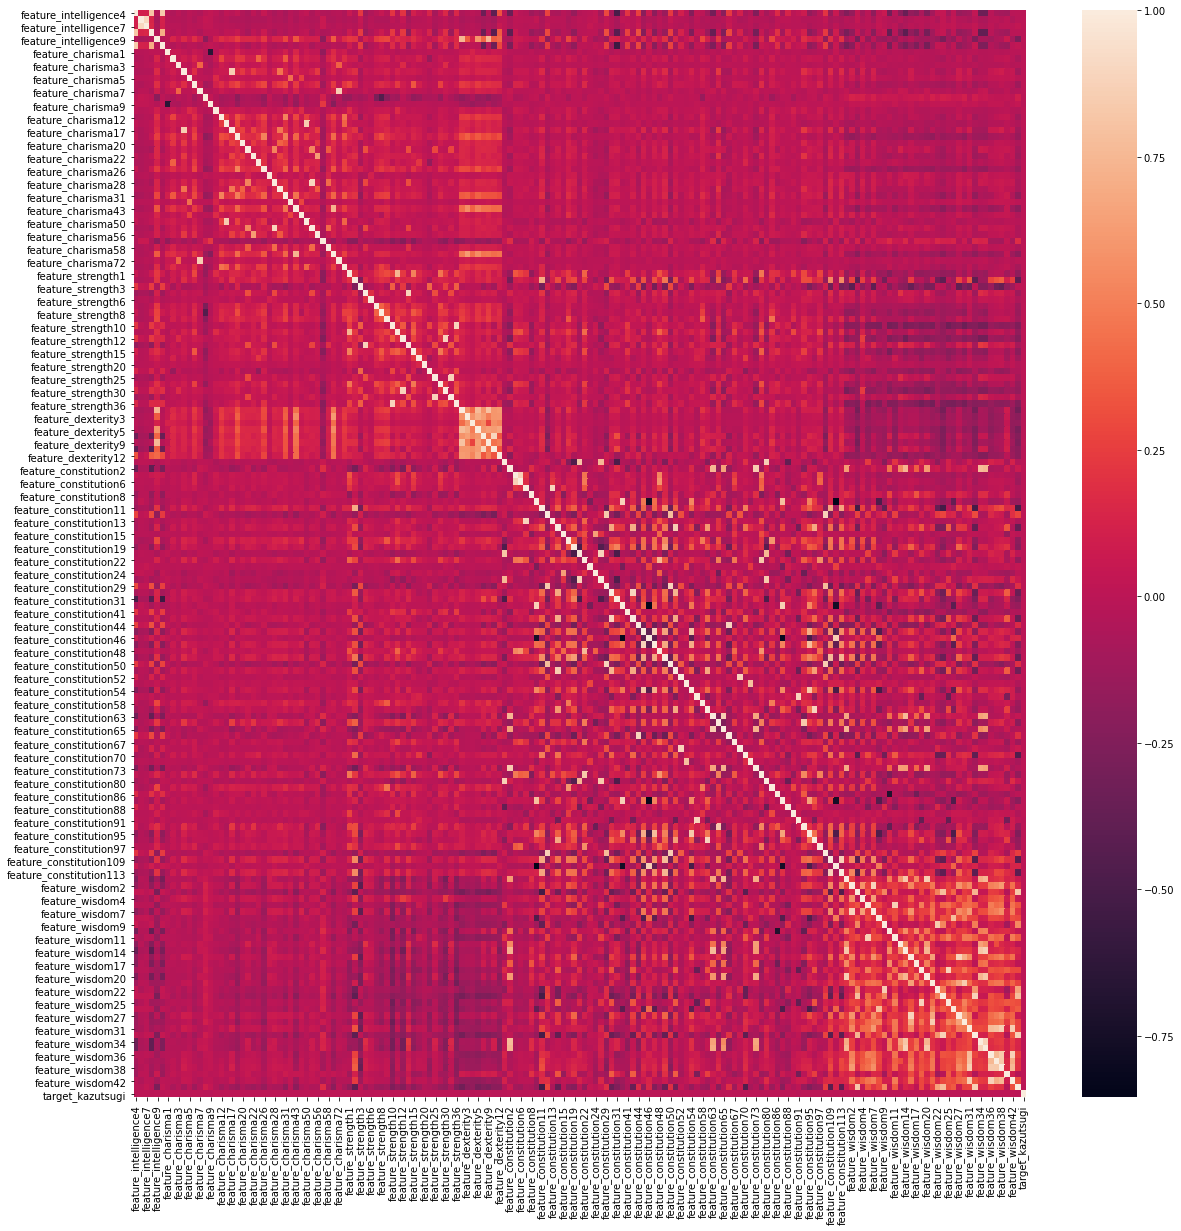

In [0]:
import seaborn as sn
fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(data.corr(),ax=ax)


In [0]:
data.shape

(501808, 167)

In [0]:
tournament_data.shape

(1565504, 314)

**Creating the test data on the bases of the selected features**

In [0]:
test_data = tournament_data.loc[:,selected_columns]

In [0]:
test_data.shape

(1565504, 167)

In [0]:
test_data.head()

,feature_intelligence4,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence11,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma12,feature_charisma13,feature_charisma17,feature_charisma18,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma26,feature_charisma27,feature_charisma28,feature_charisma30,feature_charisma31,feature_charisma41,feature_charisma43,feature_charisma44,feature_charisma50,feature_charisma53,feature_charisma56,feature_charisma57,feature_charisma58,feature_charisma63,feature_charisma72,feature_charisma84,...,feature_constitution96,feature_constitution97,feature_constitution101,feature_constitution109,feature_constitution112,feature_constitution113,feature_wisdom1,feature_wisdom2,feature_wisdom3,feature_wisdom4,feature_wisdom6,feature_wisdom7,feature_wisdom8,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom17,feature_wisdom18,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom31,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom40,feature_wisdom42,feature_wisdom43,target_kazutsugi
0,0.50,0.75,0.5,0.25,0.50,0.25,0.25,0.50,0.25,0.00,0.25,1.00,1.00,0.25,1.00,1.00,0.25,0.0,0.00,0.50,0.25,0.25,0.50,0.00,0.25,0.5,0.25,0.25,0.25,0.50,0.50,0.25,0.00,0.25,1.00,0.00,0.50,0.25,0.75,0.25,...,0.50,0.75,0.25,0.0,0.00,0.25,0.25,0.25,0.75,0.00,0.75,0.00,0.00,0.0,0.25,0.5,0.25,0.00,0.25,0.25,0.50,0.50,0.50,0.00,0.75,0.25,0.25,0.50,0.25,0.50,0.5,0.25,0.25,1.00,0.75,0.75,1.00,0.50,0.5,0.00
1,1.00,0.00,0.0,0.75,0.25,0.75,0.00,0.25,0.50,0.00,1.00,0.25,0.25,1.00,1.00,0.25,0.00,0.0,0.00,0.25,0.00,0.25,0.25,0.25,0.25,0.0,0.75,0.25,0.00,0.75,0.50,1.00,0.00,0.75,0.25,0.75,0.75,0.50,0.25,0.25,...,0.75,0.00,0.75,0.5,0.75,0.25,0.00,0.50,0.75,0.50,1.00,0.50,0.50,0.5,0.25,1.0,0.25,0.00,0.25,0.25,1.00,0.00,0.50,0.75,0.50,1.00,1.00,0.25,0.50,0.50,0.5,0.25,0.25,0.75,0.50,0.50,0.75,0.75,0.5,0.25
2,1.00,1.00,1.0,1.00,0.50,1.00,1.00,0.75,0.50,0.50,1.00,1.00,0.50,0.50,0.00,1.00,1.00,0.5,0.25,1.00,1.00,0.50,1.00,1.00,1.00,0.5,0.50,0.75,1.00,0.75,0.75,1.00,0.25,0.25,0.75,0.25,0.25,0.50,0.50,1.00,...,0.25,1.00,0.25,0.0,0.00,0.00,0.25,0.00,0.00,0.50,0.00,0.00,0.25,0.5,0.00,0.0,0.25,0.25,0.00,0.00,0.00,0.25,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.25,0.00,0.00,0.00,0.50,0.00,0.0,1.00
3,0.50,0.00,0.0,0.50,0.75,0.75,0.50,0.00,0.50,0.75,0.50,0.75,0.25,0.75,0.25,0.75,0.75,1.0,0.50,1.00,0.25,0.75,0.25,0.75,0.75,0.0,0.75,0.50,0.75,0.00,1.00,0.50,1.00,0.75,0.00,0.25,0.75,1.00,0.25,0.50,...,0.75,1.00,0.00,0.5,0.75,0.25,0.00,0.00,0.00,0.25,0.00,0.25,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.25,0.00,0.25,0.00,0.00,0.00,0.75,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.75
4,0.25,0.50,0.5,0.25,0.25,0.50,1.00,1.00,1.00,0.75,0.50,0.50,0.50,0.75,0.00,0.00,0.25,0.0,1.00,0.25,0.75,0.00,1.00,0.75,0.25,0.5,0.00,1.00,0.50,1.00,0.75,0.50,0.00,0.25,1.00,0.25,0.00,0.75,0.50,0.50,...,0.00,0.00,0.50,0.5,0.00,0.25,0.25,0.75,1.00,0.25,0.00,1.00,0.00,0.5,0.50,0.0,0.50,0.75,0.25,0.25,0.00,0.50,0.25,1.00,1.00,0.00,0.25,0.00,0.00,0.75,1.0,0.75,0.75,0.50,0.50,0.50,0.00,0.75,1.0,1.00


In [0]:
n=tournament_data.loc[:,['id','era','data_type']]

In [0]:
n.shape

(1565504, 3)

In [0]:
data_t = pd.concat([n, test_data],axis=1)

In [0]:
data_t.head()

,id,era,data_type,feature_intelligence4,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence11,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma12,feature_charisma13,feature_charisma17,feature_charisma18,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma26,feature_charisma27,feature_charisma28,feature_charisma30,feature_charisma31,feature_charisma41,feature_charisma43,feature_charisma44,feature_charisma50,feature_charisma53,feature_charisma56,feature_charisma57,feature_charisma58,...,feature_constitution96,feature_constitution97,feature_constitution101,feature_constitution109,feature_constitution112,feature_constitution113,feature_wisdom1,feature_wisdom2,feature_wisdom3,feature_wisdom4,feature_wisdom6,feature_wisdom7,feature_wisdom8,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom17,feature_wisdom18,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom31,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom40,feature_wisdom42,feature_wisdom43,target_kazutsugi
0,n0003aa52cab36c2,era121,validation,0.50,0.75,0.5,0.25,0.50,0.25,0.25,0.50,0.25,0.00,0.25,1.00,1.00,0.25,1.00,1.00,0.25,0.0,0.00,0.50,0.25,0.25,0.50,0.00,0.25,0.5,0.25,0.25,0.25,0.50,0.50,0.25,0.00,0.25,1.00,0.00,0.50,...,0.50,0.75,0.25,0.0,0.00,0.25,0.25,0.25,0.75,0.00,0.75,0.00,0.00,0.0,0.25,0.5,0.25,0.00,0.25,0.25,0.50,0.50,0.50,0.00,0.75,0.25,0.25,0.50,0.25,0.50,0.5,0.25,0.25,1.00,0.75,0.75,1.00,0.50,0.5,0.00
1,n000920ed083903f,era121,validation,1.00,0.00,0.0,0.75,0.25,0.75,0.00,0.25,0.50,0.00,1.00,0.25,0.25,1.00,1.00,0.25,0.00,0.0,0.00,0.25,0.00,0.25,0.25,0.25,0.25,0.0,0.75,0.25,0.00,0.75,0.50,1.00,0.00,0.75,0.25,0.75,0.75,...,0.75,0.00,0.75,0.5,0.75,0.25,0.00,0.50,0.75,0.50,1.00,0.50,0.50,0.5,0.25,1.0,0.25,0.00,0.25,0.25,1.00,0.00,0.50,0.75,0.50,1.00,1.00,0.25,0.50,0.50,0.5,0.25,0.25,0.75,0.50,0.50,0.75,0.75,0.5,0.25
2,n0038e640522c4a6,era121,validation,1.00,1.00,1.0,1.00,0.50,1.00,1.00,0.75,0.50,0.50,1.00,1.00,0.50,0.50,0.00,1.00,1.00,0.5,0.25,1.00,1.00,0.50,1.00,1.00,1.00,0.5,0.50,0.75,1.00,0.75,0.75,1.00,0.25,0.25,0.75,0.25,0.25,...,0.25,1.00,0.25,0.0,0.00,0.00,0.25,0.00,0.00,0.50,0.00,0.00,0.25,0.5,0.00,0.0,0.25,0.25,0.00,0.00,0.00,0.25,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.25,0.00,0.00,0.00,0.50,0.00,0.0,1.00
3,n004ac94a87dc54b,era121,validation,0.50,0.00,0.0,0.50,0.75,0.75,0.50,0.00,0.50,0.75,0.50,0.75,0.25,0.75,0.25,0.75,0.75,1.0,0.50,1.00,0.25,0.75,0.25,0.75,0.75,0.0,0.75,0.50,0.75,0.00,1.00,0.50,1.00,0.75,0.00,0.25,0.75,...,0.75,1.00,0.00,0.5,0.75,0.25,0.00,0.00,0.00,0.25,0.00,0.25,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.25,0.00,0.25,0.00,0.00,0.00,0.75,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.75
4,n0052fe97ea0c05f,era121,validation,0.25,0.50,0.5,0.25,0.25,0.50,1.00,1.00,1.00,0.75,0.50,0.50,0.50,0.75,0.00,0.00,0.25,0.0,1.00,0.25,0.75,0.00,1.00,0.75,0.25,0.5,0.00,1.00,0.50,1.00,0.75,0.50,0.00,0.25,1.00,0.25,0.00,...,0.00,0.00,0.50,0.5,0.00,0.25,0.25,0.75,1.00,0.25,0.00,1.00,0.00,0.5,0.50,0.0,0.50,0.75,0.25,0.25,0.00,0.50,0.25,1.00,1.00,0.00,0.25,0.00,0.00,0.75,1.0,0.75,0.75,0.50,0.50,0.50,0.00,0.75,1.0,1.00


In [0]:
train_data = pd.concat([training_data.iloc[:,:3], data],axis=1)

In [0]:
train_data.head()

,id,era,data_type,feature_intelligence4,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence11,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma12,feature_charisma13,feature_charisma17,feature_charisma18,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma26,feature_charisma27,feature_charisma28,feature_charisma30,feature_charisma31,feature_charisma41,feature_charisma43,feature_charisma44,feature_charisma50,feature_charisma53,feature_charisma56,feature_charisma57,feature_charisma58,...,feature_constitution96,feature_constitution97,feature_constitution101,feature_constitution109,feature_constitution112,feature_constitution113,feature_wisdom1,feature_wisdom2,feature_wisdom3,feature_wisdom4,feature_wisdom6,feature_wisdom7,feature_wisdom8,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom17,feature_wisdom18,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom31,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom40,feature_wisdom42,feature_wisdom43,target_kazutsugi
0,n000315175b67977,era1,train,0.00,0.25,0.25,0.25,0.75,0.25,1.00,0.75,0.5,1.0,0.5,0.00,0.50,0.50,0.00,0.0,1.00,0.25,0.75,0.50,0.75,0.75,0.5,0.50,0.25,0.75,0.75,0.25,0.25,0.75,0.50,0.25,0.25,0.75,0.5,0.00,0.00,...,0.25,0.25,0.50,0.50,0.50,0.50,0.25,1.00,0.75,0.50,0.75,0.75,0.75,0.75,0.75,0.50,1.00,0.50,0.75,0.25,0.25,0.50,1.00,0.5,0.75,0.25,0.50,1.00,0.75,1.00,0.5,0.50,0.50,0.75,1.00,1.00,0.75,0.75,0.50,0.75
1,n0014af834a96cdd,era1,train,0.25,0.00,0.00,0.25,0.50,0.00,0.00,0.50,0.5,0.5,0.5,0.50,0.25,0.25,0.50,0.0,0.50,0.50,0.50,0.75,0.50,0.75,0.5,0.25,0.50,0.50,0.75,0.50,0.75,0.50,0.00,0.25,0.50,1.00,0.5,1.00,1.00,...,1.00,1.00,0.75,0.75,0.00,1.00,0.50,1.00,0.00,0.25,1.00,1.00,0.25,0.25,0.25,1.00,0.50,0.50,0.50,0.25,1.00,1.00,1.00,0.5,0.50,1.00,0.25,0.75,1.00,1.00,0.5,0.50,0.75,0.75,0.75,1.00,0.00,0.75,0.25,0.25
2,n001c93979ac41d4,era1,train,0.25,0.75,0.75,0.25,0.00,0.50,0.50,0.75,0.5,0.5,1.0,0.50,0.50,0.50,0.25,0.0,0.75,0.75,0.50,0.25,0.75,0.25,0.5,0.50,0.50,0.25,0.75,0.50,0.75,0.75,0.50,1.00,0.75,0.75,0.5,0.00,0.00,...,0.00,0.25,0.00,0.25,0.00,0.25,1.00,0.50,1.00,0.75,1.00,0.75,0.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.50,1.0,1.00,0.00,0.50,0.75,0.00,0.50,1.0,0.75,1.00,0.25,0.50,0.25,0.00,0.50,1.00,0.00
3,n0034e4143f22a13,era1,train,0.50,0.25,0.25,0.75,0.25,0.50,0.75,0.50,1.0,0.5,0.5,0.00,1.00,0.00,0.75,0.0,0.50,0.50,0.50,0.75,0.50,0.25,0.5,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.25,0.25,0.50,0.50,0.5,1.00,0.75,...,0.00,0.25,0.00,0.25,0.75,0.25,1.00,1.00,1.00,1.00,0.75,1.00,1.00,1.00,0.75,0.75,0.75,0.75,0.75,0.75,1.00,1.00,0.75,1.0,0.50,0.75,1.00,0.75,1.00,1.00,0.5,0.75,0.75,1.00,0.75,1.00,0.75,1.00,1.00,0.00
4,n00679d1a636062f,era1,train,0.25,0.25,0.50,0.25,0.25,0.25,0.75,0.50,0.0,0.5,0.5,0.25,0.00,0.50,0.00,0.5,0.50,0.50,0.50,0.50,0.50,0.25,0.5,0.50,0.25,0.50,0.25,0.50,0.75,0.50,0.25,0.00,0.50,0.50,0.5,0.25,0.50,...,0.50,0.25,0.00,0.50,0.75,0.50,0.25,0.75,0.00,0.50,1.00,0.75,1.00,0.25,0.75,1.00,0.00,0.00,0.75,1.00,0.50,0.25,0.50,0.0,0.50,0.50,0.75,0.75,0.50,0.75,0.5,0.25,0.25,0.75,0.50,0.75,0.25,0.75,0.00,0.75


In [0]:
train_data.shape

(501808, 170)

**Combining the validation data with the training dataset**

In [0]:
validation_data = data_t[data_t.data_type=='validation']
complete_training_data = pd.concat([train_data,validation_data])

In [0]:
validation_data.shape

(106895, 170)

In [0]:
complete_training_data.shape

(608703, 170)

In [0]:
complete_training_data.head()

,id,era,data_type,feature_intelligence4,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence11,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma12,feature_charisma13,feature_charisma17,feature_charisma18,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma26,feature_charisma27,feature_charisma28,feature_charisma30,feature_charisma31,feature_charisma41,feature_charisma43,feature_charisma44,feature_charisma50,feature_charisma53,feature_charisma56,feature_charisma57,feature_charisma58,...,feature_constitution96,feature_constitution97,feature_constitution101,feature_constitution109,feature_constitution112,feature_constitution113,feature_wisdom1,feature_wisdom2,feature_wisdom3,feature_wisdom4,feature_wisdom6,feature_wisdom7,feature_wisdom8,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom17,feature_wisdom18,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom31,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom40,feature_wisdom42,feature_wisdom43,target_kazutsugi
0,n000315175b67977,era1,train,0.00,0.25,0.25,0.25,0.75,0.25,1.00,0.75,0.5,1.0,0.5,0.00,0.50,0.50,0.00,0.0,1.00,0.25,0.75,0.50,0.75,0.75,0.5,0.50,0.25,0.75,0.75,0.25,0.25,0.75,0.50,0.25,0.25,0.75,0.5,0.00,0.00,...,0.25,0.25,0.50,0.50,0.50,0.50,0.25,1.00,0.75,0.50,0.75,0.75,0.75,0.75,0.75,0.50,1.00,0.50,0.75,0.25,0.25,0.50,1.00,0.5,0.75,0.25,0.50,1.00,0.75,1.00,0.5,0.50,0.50,0.75,1.00,1.00,0.75,0.75,0.50,0.75
1,n0014af834a96cdd,era1,train,0.25,0.00,0.00,0.25,0.50,0.00,0.00,0.50,0.5,0.5,0.5,0.50,0.25,0.25,0.50,0.0,0.50,0.50,0.50,0.75,0.50,0.75,0.5,0.25,0.50,0.50,0.75,0.50,0.75,0.50,0.00,0.25,0.50,1.00,0.5,1.00,1.00,...,1.00,1.00,0.75,0.75,0.00,1.00,0.50,1.00,0.00,0.25,1.00,1.00,0.25,0.25,0.25,1.00,0.50,0.50,0.50,0.25,1.00,1.00,1.00,0.5,0.50,1.00,0.25,0.75,1.00,1.00,0.5,0.50,0.75,0.75,0.75,1.00,0.00,0.75,0.25,0.25
2,n001c93979ac41d4,era1,train,0.25,0.75,0.75,0.25,0.00,0.50,0.50,0.75,0.5,0.5,1.0,0.50,0.50,0.50,0.25,0.0,0.75,0.75,0.50,0.25,0.75,0.25,0.5,0.50,0.50,0.25,0.75,0.50,0.75,0.75,0.50,1.00,0.75,0.75,0.5,0.00,0.00,...,0.00,0.25,0.00,0.25,0.00,0.25,1.00,0.50,1.00,0.75,1.00,0.75,0.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.50,1.0,1.00,0.00,0.50,0.75,0.00,0.50,1.0,0.75,1.00,0.25,0.50,0.25,0.00,0.50,1.00,0.00
3,n0034e4143f22a13,era1,train,0.50,0.25,0.25,0.75,0.25,0.50,0.75,0.50,1.0,0.5,0.5,0.00,1.00,0.00,0.75,0.0,0.50,0.50,0.50,0.75,0.50,0.25,0.5,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.25,0.25,0.50,0.50,0.5,1.00,0.75,...,0.00,0.25,0.00,0.25,0.75,0.25,1.00,1.00,1.00,1.00,0.75,1.00,1.00,1.00,0.75,0.75,0.75,0.75,0.75,0.75,1.00,1.00,0.75,1.0,0.50,0.75,1.00,0.75,1.00,1.00,0.5,0.75,0.75,1.00,0.75,1.00,0.75,1.00,1.00,0.00
4,n00679d1a636062f,era1,train,0.25,0.25,0.50,0.25,0.25,0.25,0.75,0.50,0.0,0.5,0.5,0.25,0.00,0.50,0.00,0.5,0.50,0.50,0.50,0.50,0.50,0.25,0.5,0.50,0.25,0.50,0.25,0.50,0.75,0.50,0.25,0.00,0.50,0.50,0.5,0.25,0.50,...,0.50,0.25,0.00,0.50,0.75,0.50,0.25,0.75,0.00,0.50,1.00,0.75,1.00,0.25,0.75,1.00,0.00,0.00,0.75,1.00,0.50,0.25,0.50,0.0,0.50,0.50,0.75,0.75,0.50,0.75,0.5,0.25,0.25,0.75,0.50,0.75,0.25,0.75,0.00,0.75


In [0]:
features = [f for f in list(complete_training_data) if "feature" in f]
X = complete_training_data[features]
Y = complete_training_data["target_kazutsugi"]

In [0]:
features

['feature_intelligence4',
 'feature_intelligence6',
 'feature_intelligence7',
 'feature_intelligence8',
 'feature_intelligence9',
 'feature_intelligence11',
 'feature_charisma1',
 'feature_charisma2',
 'feature_charisma3',
 'feature_charisma4',
 'feature_charisma5',
 'feature_charisma6',
 'feature_charisma7',
 'feature_charisma8',
 'feature_charisma9',
 'feature_charisma10',
 'feature_charisma12',
 'feature_charisma13',
 'feature_charisma17',
 'feature_charisma18',
 'feature_charisma20',
 'feature_charisma21',
 'feature_charisma22',
 'feature_charisma23',
 'feature_charisma26',
 'feature_charisma27',
 'feature_charisma28',
 'feature_charisma30',
 'feature_charisma31',
 'feature_charisma41',
 'feature_charisma43',
 'feature_charisma44',
 'feature_charisma50',
 'feature_charisma53',
 'feature_charisma56',
 'feature_charisma57',
 'feature_charisma58',
 'feature_charisma63',
 'feature_charisma72',
 'feature_charisma84',
 'feature_strength1',
 'feature_strength2',
 'feature_strength3',
 'fe

**Creating Neural Network Model**

In [0]:
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupKFold
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2


Using TensorFlow backend.


In [0]:
#Performing Predictions with Keras and scikit-learn
def create_model(neurons=400, dropout=0.5):         
    model = Sequential()
    model.add(Dense(neurons, input_shape=(166,), kernel_initializer='glorot_uniform', use_bias=False))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Activation('relu'))
    model.add(Dense(1, activation='linear', kernel_initializer='glorot_normal'))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])      
    return model

In [0]:
model = KerasRegressor(build_fn=create_model, epochs=30, batch_size=400, verbose=0)         

In [0]:
gkf = GroupKFold(n_splits=5)
kfold_split = gkf.split(X, Y, groups=complete_training_data.era)

In [0]:
neurons = [70, 80]  
dropout = [0.2, 0.3]    
param_grid = dict(neurons=neurons, dropout=dropout)

In [0]:
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=200, verbose = 3)
rsearch_result = rsearch.fit(X.values, Y.values)       

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=200. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] neurons=70, dropout=0.2 .........................................
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

[CV] ............ neurons=70, dropout=0.2, score=-0.125, total= 3.2min
[CV] neurons=70, dropout=0.2 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min remaining:    0.0s


[CV] ............ neurons=70, dropout=0.2, score=-0.125, total= 3.1min
[CV] neurons=70, dropout=0.2 .........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.3min remaining:    0.0s


[CV] ............ neurons=70, dropout=0.2, score=-0.126, total= 3.1min
[CV] neurons=70, dropout=0.2 .........................................
[CV] ............ neurons=70, dropout=0.2, score=-0.125, total= 3.1min
[CV] neurons=70, dropout=0.2 .........................................
[CV] ............ neurons=70, dropout=0.2, score=-0.126, total= 3.1min
[CV] neurons=80, dropout=0.2 .........................................
[CV] ............ neurons=80, dropout=0.2, score=-0.125, total= 3.2min
[CV] neurons=80, dropout=0.2 .........................................
[CV] ............ neurons=80, dropout=0.2, score=-0.125, total= 3.1min
[CV] neurons=80, dropout=0.2 .........................................
[CV] ............ neurons=80, dropout=0.2, score=-0.126, total= 3.1min
[CV] neurons=80, dropout=0.2 .........................................
[CV] ............ neurons=80, dropout=0.2, score=-0.126, total= 3.1min
[CV] neurons=80, dropout=0.2 .........................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 64.4min finished


In [0]:
print("Best: %f using %s" % (rsearch_result.best_score_, rsearch_result.best_params_))
means = rsearch_result.cv_results_['mean_test_score']
stds = rsearch_result.cv_results_['std_test_score']
params = rsearch_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.125260 using {'neurons': 70, 'dropout': 0.3}
-0.125496 (0.000329) with: {'neurons': 70, 'dropout': 0.2}
-0.125566 (0.000311) with: {'neurons': 80, 'dropout': 0.2}
-0.125260 (0.000264) with: {'neurons': 70, 'dropout': 0.3}
-0.125325 (0.000340) with: {'neurons': 80, 'dropout': 0.3}


**Checking the Performance**

In [0]:
def check_consistency(model, valid_data):
    eras = valid_data.era.unique()
    count = 0
    count_consistent = 0
    for era in eras:
        count += 1
        current_valid_data = valid_data[validation_data.era==era]
        features = [f for f in list(complete_training_data) if "feature" in f]                        
        X_valid = current_valid_data[features]
        Y_valid = current_valid_data["target_kazutsugi"]
        loss = model.evaluate(X_valid.values, Y_valid.values, batch_size=250, verbose=3)[0]
        if (loss < -np.log(.5)):
            consistent = True
            count_consistent += 1
        else:
            consistent = False
        print("{}: loss - {} consistent: {}".format(era, loss, consistent))
    print ("Consistency: {}".format(count_consistent/count))
        

check_consistency(rsearch_result.best_estimator_.model, validation_data)

era121: loss - 0.12279404255830562 consistent: True
era122: loss - 0.12286569187701542 consistent: True
era123: loss - 0.12207635487236825 consistent: True
era124: loss - 0.12219365662040257 consistent: True
era125: loss - 0.12172845556298029 consistent: True
era126: loss - 0.12321410077038814 consistent: True
era127: loss - 0.12317254822129073 consistent: True
era128: loss - 0.12264753895152017 consistent: True
era129: loss - 0.12365317094465371 consistent: True
era130: loss - 0.12255821216309441 consistent: True
era131: loss - 0.12274448035302675 consistent: True
era132: loss - 0.12213611302716179 consistent: True
era197: loss - 0.12209216105026498 consistent: True
era198: loss - 0.122749041992542 consistent: True
era199: loss - 0.1238673141526071 consistent: True
era200: loss - 0.12317163882662592 consistent: True
era201: loss - 0.12326770517099286 consistent: True
era202: loss - 0.12225221829353475 consistent: True
era203: loss - 0.123331592319463 consistent: True
era204: loss - 0.

**Submitting the Predictions**

In [0]:
import time
x_prediction = data_t[features]
t_id = data_t["id"]
y_prediction = rsearch_result.best_estimator_.model.predict_proba(x_prediction.values, batch_size=400)
results = np.reshape(y_prediction,-1)
results_df = pd.DataFrame(data={'probability_kazutsugi':results})


In [0]:
y_prediction

array([[0.5029201 ],
       [0.4902809 ],
       [0.5662728 ],
       ...,
       [0.5211403 ],
       [0.4681828 ],
       [0.52895975]], dtype=float32)

In [0]:
joined = pd.DataFrame(t_id).join(results_df)
print()

In [0]:
joined

,id,probability_kazutsugi
0,n0003aa52cab36c2,0.502920
1,n000920ed083903f,0.490281
2,n0038e640522c4a6,0.566273
3,n004ac94a87dc54b,0.486296
4,n0052fe97ea0c05f,0.498340
...,...,...
1565499,nffcd4f6a7f212eb,0.505800
1565500,nffd07750a253501,0.502816
1565501,nffeec4db8efee3e,0.521140
1565502,nfff33d1df9310a2,0.468183


In [0]:
from time import gmtime, strftime
strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime())
joined = pd.DataFrame(t_id).join(results_df)
# path = "predictions_w_loss_0_" + '{:4.0f}'.format(history.history['loss'][-1]*10000) + ".csv"
path = 'predictions_{:}'.format(strftime("%Y-%m-%d_%Hh%Mm%Ss", time.gmtime())) + '.csv'
print()
print("Writing predictions to " + path.strip())
# # Save the predictions out to a CSV file
joined.to_csv(path,float_format='%.15f', index=False)


Writing predictions to predictions_2020-06-07_15h41m21s.csv
